<a href="https://colab.research.google.com/github/EasonChen78/machine_learning/blob/main/20230410_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
((x_train, y_train), (x_test, y_test)) = mnist.load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [3]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


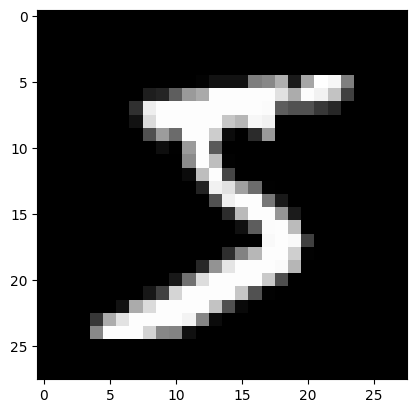

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    Dense(256, activation="relu", input_dim=784),
    Dense(10, activation="softmax")
]

model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 指定loss採用交叉熵的 方法1
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])
# # 指定loss採用交叉熵的 方法2
# model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("mnist.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(x_train_norm, y_train_cat, batch_size=100, epochs=40, validation_split=0.1, callbacks=c)

Epoch 1/40
540/540 [==============================] - 5s 8ms/step - loss: 0.3024 - accuracy: 0.9147 - val_loss: 0.1289 - val_accuracy: 0.9660
Epoch 2/40
540/540 [==============================] - 4s 7ms/step - loss: 0.1320 - accuracy: 0.9616 - val_loss: 0.0944 - val_accuracy: 0.9737
Epoch 3/40
540/540 [==============================] - 5s 9ms/step - loss: 0.0888 - accuracy: 0.9739 - val_loss: 0.0847 - val_accuracy: 0.9765
Epoch 4/40
540/540 [==============================] - 4s 7ms/step - loss: 0.0650 - accuracy: 0.9813 - val_loss: 0.0724 - val_accuracy: 0.9787
Epoch 5/40
540/540 [==============================] - 2s 4ms/step - loss: 0.0508 - accuracy: 0.9851 - val_loss: 0.0750 - val_accuracy: 0.9768
Epoch 6/40
540/540 [==============================] - 2s 4ms/step - loss: 0.0402 - accuracy: 0.9885 - val_loss: 0.0755 - val_accuracy: 0.9775
Epoch 7/40
540/540 [==============================] - 2s 4ms/step - loss: 0.0301 - accuracy: 0.9918 - val_loss: 0.0647 - val_accuracy: 0.9818
Epoch 

In [10]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9789


[0.07512106746435165, 0.9789000153541565]

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat, 
       index=[f"{i}(true)" for i in range(0, 10)],
       columns=[f"{i}(pred)" for i in range(0, 10)])

313/313 [==============================] - 0s 1ms/step


,0(pred),1(pred),2(pred),3(pred),4(pred),5(pred),6(pred),7(pred),8(pred),9(pred)
0(true),970,0,1,1,0,1,2,2,1,2
1(true),0,1124,4,0,0,1,2,1,3,0
2(true),5,1,1014,1,1,0,1,6,3,0
3(true),0,0,6,984,0,3,0,8,3,6
4(true),3,0,6,0,958,0,2,2,1,10
5(true),2,0,0,5,1,876,3,2,1,2
6(true),4,2,4,1,1,7,936,3,0,0
7(true),0,0,8,1,0,0,0,1016,0,3
8(true),5,1,6,7,4,9,2,6,927,7
9(true),1,2,0,6,6,1,0,9,0,984


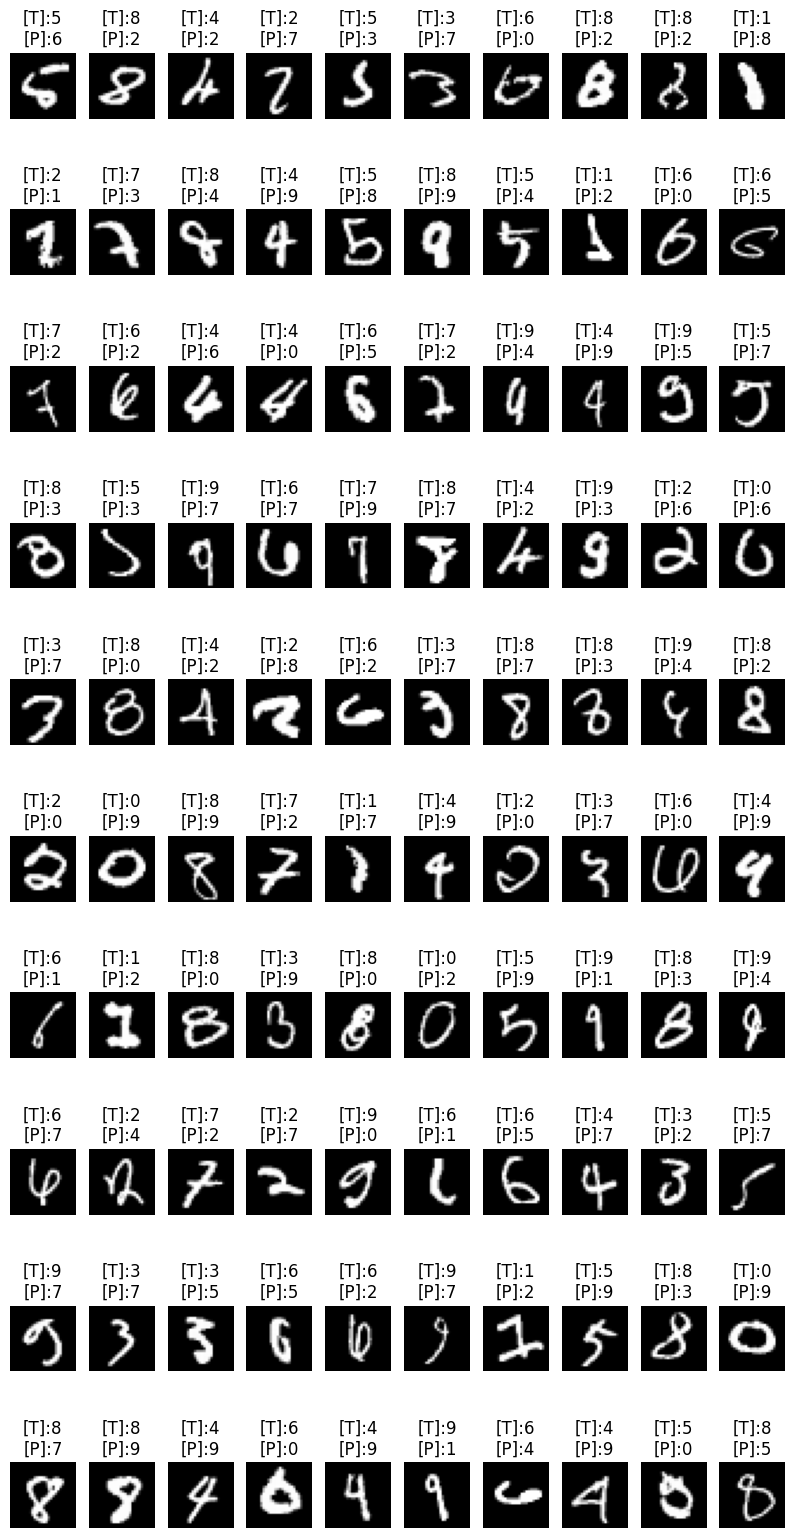

In [12]:
idx = np.nonzero(pre != y_test)[0]
idx = idx[:100]
plt.figure(figsize=(10, 20))
fp_pred = pre[idx]
fp_true = y_test[idx]
fp_img = x_test[idx]
for i in range(len(idx)):
  plt.subplot(10, 10, i+1)
  plt.axis("off")
  t = f"[T]:{fp_true[i]}\n[P]:{fp_pred[i]}"
  plt.title(t)
  plt.imshow(fp_img[i], cmap="gray")

1/1 [==============================] - 0s 18ms/step
0 的機率是： 0.0
1 的機率是： 0.0
2 的機率是： 0.0
3 的機率是： 0.0002
4 的機率是： 0.0
5 的機率是： 0.9998
6 的機率是： 0.0
7 的機率是： 0.0
8 的機率是： 0.0
9 的機率是： 0.0
最高機率是： 5


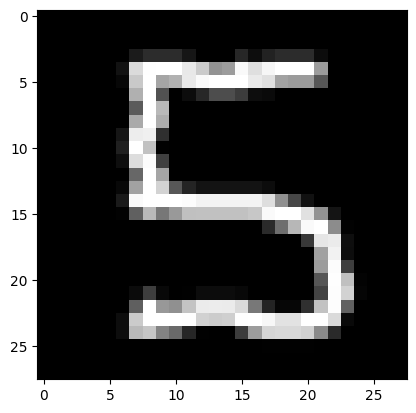

In [18]:
from PIL import Image
fn = "mnist_test.png" #@param {type:"string"}
img = Image.open(fn).resize((28, 28)).convert("L")
img_np = np.array(img)
# print(pd.DataFrame(img_np))
testx = img_np.reshape(1, 784) / 255.0
probas = model.predict(testx)[0]
for i in range(0, 10):
  print(i, "的機率是：", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是：", ans)
plt.imshow(img_np, cmap="gray")